<center><h1><u>Outlander</h1>

<b> Outlander is a historical drama television series based on the ongoing novel series of the same name by Diana Gabaldon. Developed by Ronald D. Moore, the show premiered on August 9, 2014, on Starz. 

   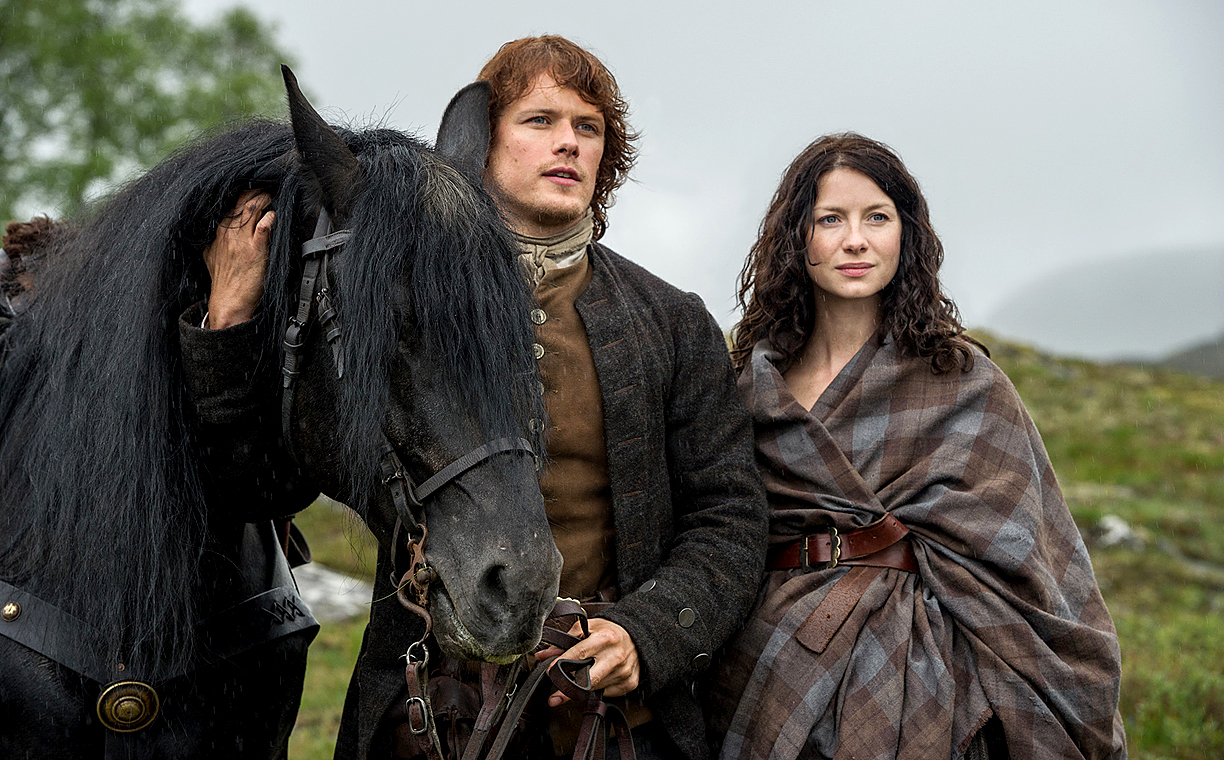
    
<b> It stars Caitríona Balfe (right) as Claire Randall, a married former Second World War military nurse in Scotland who, in 1945, finds herself transported back in time to 1743. There she encounters, falls in love with, and marries a dashing Highland warrior named Jamie Fraser played by Sam Heughan (left ... not the horse), a Tacksman of Gabaldon's fictionalized version of Clan Fraser of Lovat, and becomes embroiled in the Jacobite rising.

<b> Dropping the opening theme URL below just in case you accidentally watch and fall in love with the show ...

https://open.spotify.com/track/10VIsMEvM4K2xgFvh9plJi

<h2> On a more serious note... Let's import libraries for scraping in info for the first season; my personal fave ... 

In [1]:
from bs4 import BeautifulSoup 
import requests
from requests import get
import pandas as pd
import os, sys

<h3> Let's request information from IMDB's page for season 1

In [84]:
# This page witholds information pertaining to the best season of outlander  
url = 'https://www.imdb.com/title/tt3006802/episodes?season=1'
response = requests.get(url)
season_page = BeautifulSoup(response.content)
episode_tiles = season_page.findAll('div',attrs={'class': 'info'})

<h2><u>Manual info finder</u> : 

<h3> 1. Enter the episode name you wish to seek details for but -1 ... So if the episode no. you want is '2', then enter '1' as demonstrated below

<h3> 2. Press 'Enter'

In [142]:
def outlandish_info_finder():
    i = int(input('Enter the episode number:'))
    print('-'*120)
    episode_number = episode_tiles[i]
    episode_name = episode_number.strong.a.text
    episode_desc = episode_number.find('div',attrs={'class','item_description'}).text.strip()
    episode_date = episode_number.find('div',class_='airdate').text.strip().replace('.','')
    episode_rate = epi_rate.find('div','ipl-rating-widget').find(
            'div','ipl-rating-star small').find(
            'span','ipl-rating-star__rating').text

    print(f'Episode Name: {episode_name}\nAiring Date: {episode_date}\nRatings: {episode_rate}\nDescription:\n{episode_desc}')

In [143]:
outlandish_info_finder()

Enter the episode number:1
------------------------------------------------------------------------------------------------------------------------
Episode Name: Castle Leoch
Airing Date: 16 Aug 2014
Ratings: 8.5
Description:
Claire is brought to Castle Leoch under suspicion as an English spy. Learning that the year is 1743, she tries to arrange travel back to the standing stones. Colum MacKenzie uses her ability as a healer as an excuse to detain her.


### Ach! That was easy... But, what if we were to binge on more episodes? (accidentally of course.) and wanted to know more ... Aye! we need a tabular overview and for that ye ken... we consolidate the descriptions in a pandas data frame 

-----------------------------------------------------------------------------------------------------------------

In [87]:
NAME = []
for epi_name in episode_tiles:        
    name = epi_name.strong.a.text
    NAME.append(name)

<h4> We begin by creating an empty list that will hold the episode names using nested loop for iterating over all of them after appending, and follow a similar syntax for the rest of the meta data ...

In [90]:
AIRDATE = []
for epi_date in episode_tiles:        
    date = epi_date.find('div',class_='airdate').text.strip().replace('.','')
    AIRDATE.append(date)

<b> We do not want the escape characters in the Airdate tag and the full stop. That's why we replace it with white space.

In [93]:
DESC = []
for epi_des in episode_tiles:
    desc = epi_des.find('div',attrs={'class','item_description'}).text.strip()
    DESC.append(desc)

In [108]:
RATE = []
for epi_rate in episode_tiles:
    rate = epi_rate.find('div','ipl-rating-widget').find(
        'div','ipl-rating-star small').find(
        'span','ipl-rating-star__rating').text
    RATE.append(rate)

<h4> Extracting user ratings was a little taxing... see all of those nested tags!?

In [111]:
sea_1 = {
    'Episode_Name':NAME,
    'Date_Of_Airing':AIRDATE,
    'Ratings_OutOf_10':RATE,
    'Description':DESC
}

In [112]:
season_1 = pd.DataFrame(sea_1)

In [114]:
season_1

,Episode_Name,Date_Of_Airing,Ratings_OutOf_10,Description
0,Sassenach,4 Oct 2017,8.4,1945 England: Claire Randall reunites with her...
1,Castle Leoch,16 Aug 2014,8.5,Claire is brought to Castle Leoch under suspic...
2,The Way Out,23 Aug 2014,8.7,Claire's abilities as a healer puts her at odd...
3,The Gathering,30 Aug 2014,8.7,The Gathering shows Claire's attempt at her fi...
4,Rent,6 Sep 2014,8.7,Claire goes on the road with Dougal as he coll...
5,The Garrison Commander,13 Sep 2014,9.1,Claire and Dougal are questioned at the local ...
6,The Wedding,20 Sep 2014,9.0,Marriage to a Scot seems to be the only legal ...
7,Both Sides Now,27 Sep 2014,8.9,"In 1945, Frank is still seeking Claire, but is..."
8,The Reckoning,4 Apr 2015,8.6,Jamie and the Highlanders attempt to rescue Cl...
9,By the Pricking of My Thumbs,11 Apr 2015,8.5,Jamie hopes the Duke of Sandringham can help r...


<h3>JESUS H. ROOSEVELT CHRIST, IMDB !!! The airing date of the first episode is WRONG !!! As a domain expert, who can't just can't stop talking about how good this show is... * hint, hint * I shall change it ...

In [117]:
season_1.dtypes

Episode_Name        object
Date_Of_Airing      object
Ratings_OutOf_10    object
Description         object
dtype: object

In [149]:
season_1['Date_Of_Airing'].replace("4 Oct 2017","9 Aug 2014",inplace=True)

In [150]:
season_1['Date_Of_Airing'][0]

'9 Aug 2014'

<h3> Aye Sassenach D'ye Ken !? ... oops ... I meant, the date has been changed successfully!
    
<h3> Let's now see the most highly rated episode of Season 1, Mo Nighean Donn 😉 ...

In [151]:
highest_rated_epi = season_1[season_1['Ratings_OutOf_10']==season_1['Ratings_OutOf_10'].max()]

In [152]:
highest_rated_epi

,Episode_Name,Date_Of_Airing,Ratings_OutOf_10,Description
10,The Devil's Mark,18 Apr 2015,9.3,Claire and Geillis stand trial for witchcraft;...


In [153]:
highest_rated_epi['Description'].all()

"Claire and Geillis stand trial for witchcraft; Claire learns a secret about Geillis' past."

<h3> Trust me, this episode is just as intriguing and mysterious as its description... 

### <u>Checking the median rating 

In [155]:
round(season_1['Ratings_OutOf_10'].median(),2)

8.65

### Hmm, 8.65 stars... Not too shabby for a first season, eh ? Need I say more?

-------------

<h2><u>Scope of this mini project</u>: 
    
<h3> 1. This was just Season 1, if we want to dig deeper, we can always pipeline the codes in a way that demands the user to enter the season they wish to view the information
    
<h3> 2. Sentiment analysis of user reviews for the show on IMDB